In [35]:
import torch
import torch.nn as nn
import torchvision.datasets as datasets 
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.utils import make_grid

In [57]:
class AutoEncoder(nn.Module):
    def __init__(self,input_dim,laten_dim=3):
        super().__init__()
        
        self.encoded=nn.Sequential(
            nn.Linear(784,128),
            nn.ReLU(),
            nn.Linear(128,64),
            nn.ReLU(),
            nn.Linear(64,12),
            nn.ReLU(),
            nn.Linear(12,laten_dim),
            nn.Sigmoid(),        
            )


        self.decoded=nn.Sequential(
            nn.Linear(laten_dim,12),
            nn.ReLU(),
            nn.Linear(12,64),
            nn.ReLU(),
            nn.Linear(64,128),
            nn.ReLU(),
            nn.Linear(128,784),
        )

    
    def forward(self,x):
        return self.decoded(self.encoded(x))





In [55]:
def test():
    t=torch.randn(100,784)
    model=AutoEncoder(784,3)
    print(model(t).shape)

test()


torch.Size([100, 784])


In [25]:
myTransforms=transforms.Compose([
    transforms.ToTensor()
])

dataset=datasets.MNIST(root='./data',train=True,download=True,transform=myTransforms)
loader=DataLoader(dataset=dataset,batch_size=32,shuffle=True)


/Users/shreygarg/Desktop/MLPytorch/myenv/lib/python3.9/site-packages/torchvision/datasets/mnist.py:76: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


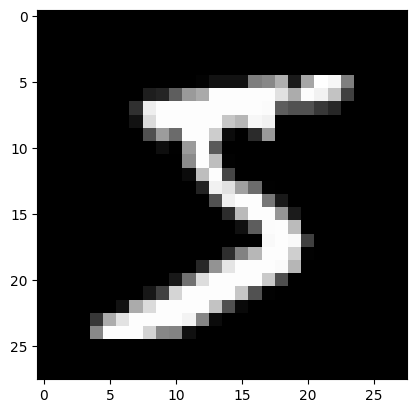

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.imshow((dataset.train_data)[0],cmap='gray')
plt.show()

torch.Size([32, 1, 28, 28])


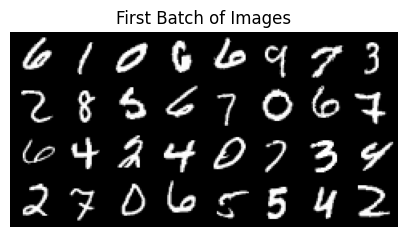

In [37]:
it=iter(loader)
first=next(it)
img,target=first
print(img.shape)

grid = make_grid(img, nrow=8, padding=2)  # nrow specifies how many images per row

# Plot the grid
plt.figure(figsize=(5,5))
plt.imshow(grid.permute(1, 2, 0), cmap='gray')  # Convert from (C, H, W) to (H, W, C) for matplotlib
plt.axis('off')
plt.title("First Batch of Images")
plt.show()


torch.Size([32, 1, 28, 28])


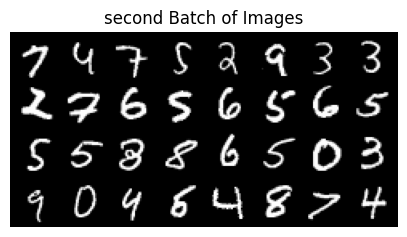

In [40]:

second=next(it)
img,target=second
print(img.shape)

grid = make_grid(img, nrow=8, padding=2)  # nrow specifies how many images per row

# Plot the grid
plt.figure(figsize=(5,5))
plt.imshow(grid.permute(1, 2, 0), cmap='gray')  # Convert from (C, H, W) to (H, W, C) for matplotlib
plt.axis('off')
plt.title("second Batch of Images")
plt.show()


In [59]:
# HyperParameters
lr=1e-3
model=AutoEncoder(784,3)
criterion=nn.MSELoss()
optimizer=torch.optim.Adam(model.parameters(),lr=lr,weight_decay=1e-5)

In [62]:
num_epochs=10
output=[]
for epoch in range(num_epochs):
    for batch_idx,(img,label) in enumerate(loader):
        img=img.view(-1,784)
        recon=model(img)
        loss=criterion(recon,img)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if(batch_idx ==0):
            print(f'Epochs {epoch+1},Loss{loss.item():.3f}')
        output.append((epoch,img,recon))

Epochs 1,Loss0.039
Epochs 2,Loss0.040
Epochs 3,Loss0.031
Epochs 4,Loss0.041
Epochs 5,Loss0.035
Epochs 6,Loss0.035
Epochs 7,Loss0.036
Epochs 8,Loss0.040
Epochs 9,Loss0.037
Epochs 10,Loss0.040


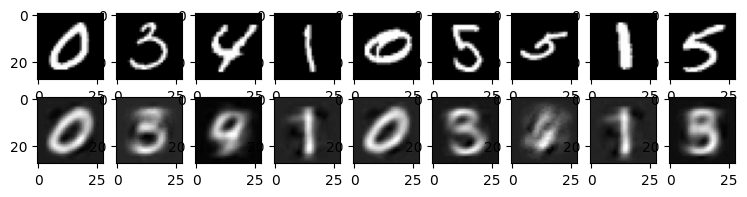

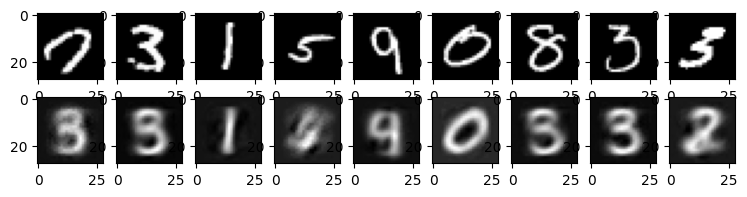

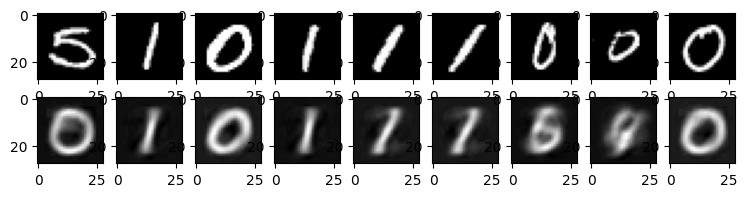

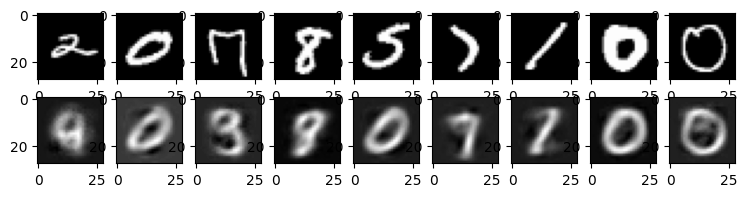

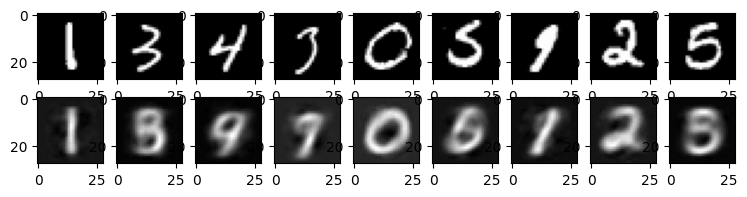

In [68]:
for i in range(0,num_epochs,2):
    plt.figure(figsize=(9,2))
    plt.gray()
    img=output[i][1].detach().numpy()
    recon=output[i][2].detach().numpy()

    for k,item in enumerate(img):
        if k>=9: break
        plt.subplot(2,9,k+1)
        item=item.reshape(-1,28,28)
        plt.imshow(item[0])

    
    for k,item in enumerate(recon):
        if k>=9: break
        plt.subplot(2,9,9+k+1)
        item=item.reshape(-1,28,28)
        plt.imshow(item[0])